In [19]:
%autosave 0
import os
import numpy as np
import seaborn as sb
import tensorflow
import tensorflow as tf

# tensorflow 2.0
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용 함수
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화

from sklearn.model_selection import train_test_split # 훈련/검증 데이터 분할
from sklearn.metrics import confusion_matrix # 혼돈 행렬
from sklearn.metrics import roc_curve        # roc 곡선

# tensorflow 1.x
# from keras.models import Sequential  # class
# from keras.models import load_model  # model 사용 함수
# from keras.layers import Dense       # class

print(tf.__version__)

Autosave disabled
2.0.0


In [2]:
data = np.loadtxt('./wine.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(6497, 13)


In [3]:
X = data[:, 0:12]
print(X.shape)
Y = data[:, 12] # 13번째 변수
print(Y.shape)

(6497, 12)
(6497,)


In [4]:
# train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
seed = 0
# 90%: 분할대기(x_train_all), 10%: 테스트(x_test)
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                  stratify=Y,
                                                  test_size=0.1,
                                                  random_state=seed)
# 나머지 데이터 90%를 분할, 70%: 훈련(x_train), 30%: 검증(x_val)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.3,
                                                  random_state=seed)

print(y_val[0:100])
print(y_val.shape)

[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0.]
(1755,)


In [9]:
model = Sequential()
# model.add(Dense(60, input_dim=12, activation='relu'))
model.add(Dense(64, input_shape=(12, ), activation='relu'))
model.add(Dense(30, activation='relu')) 
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 출력: 1, 0 ~ 1

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# 최소 오차 5번 나오면 자동 종료
early_stopping = EarlyStopping(monitor='loss', patience=5)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): # 폴더가 존재하지 않으면 생성
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:04d}-{val_accuracy:.4f}.h5'    
# 검증 정확도가 개선되었을 때만 학습 모델 파일로 저장
# filepath=modelpath: 파일이 저장되는 경로와 파일명
# monitor='val_accuracy': 검증 정확도 기준으로 판단
# verbose=1: 기록되는 파일 정보 출력
# save_best_only=True: 검증 정확도가 개선되면 파일로 저장
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_accuracy',
                               verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                 epochs=1000, batch_size=10, 
                 callbacks=[early_stopping, checkpointer])

Train on 4092 samples, validate on 1755 samples
Epoch 1/1000
3660/4092 [=========================>....] - ETA: 0s - loss: 0.2757 - accuracy: 0.8984
Epoch 00001: val_accuracy improved from -inf to 0.93162, saving model to ./model/0001-0.9316.h5
4092/4092 [==============================] - 1s 332us/sample - loss: 0.2708 - accuracy: 0.9020 - val_loss: 0.1962 - val_accuracy: 0.9316
Epoch 2/1000
3890/4092 [===========================>..] - ETA: 0s - loss: 0.2025 - accuracy: 0.9306
Epoch 00002: val_accuracy improved from 0.93162 to 0.94017, saving model to ./model/0002-0.9402.h5
4092/4092 [==============================] - 1s 192us/sample - loss: 0.2015 - accuracy: 0.9306 - val_loss: 0.1749 - val_accuracy: 0.9402
Epoch 3/1000
3910/4092 [===========================>..] - ETA: 0s - loss: 0.1902 - accuracy: 0.9355
Epoch 00003: val_accuracy improved from 0.94017 to 0.95043, saving model to ./model/0003-0.9504.h5
4092/4092 [==============================] - 1s 197us/sample - loss: 0.1902 - accura

3690/4092 [==========================>...] - ETA: 0s - loss: 0.0682 - accuracy: 0.9783
Epoch 00027: val_accuracy did not improve from 0.98234
4092/4092 [==============================] - 1s 179us/sample - loss: 0.0677 - accuracy: 0.9787 - val_loss: 0.0559 - val_accuracy: 0.9801
Epoch 28/1000
3700/4092 [==========================>...] - ETA: 0s - loss: 0.0686 - accuracy: 0.9814
Epoch 00028: val_accuracy did not improve from 0.98234
4092/4092 [==============================] - 1s 179us/sample - loss: 0.0657 - accuracy: 0.9819 - val_loss: 0.0536 - val_accuracy: 0.9823
Epoch 29/1000
3990/4092 [============================>.] - ETA: 0s - loss: 0.0622 - accuracy: 0.9807
Epoch 00029: val_accuracy did not improve from 0.98234
4092/4092 [==============================] - 1s 179us/sample - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0727 - val_accuracy: 0.9766
Epoch 30/1000
4080/4092 [============================>.] - ETA: 0s - loss: 0.0604 - accuracy: 0.9826
Epoch 00030: val_accuracy did not 

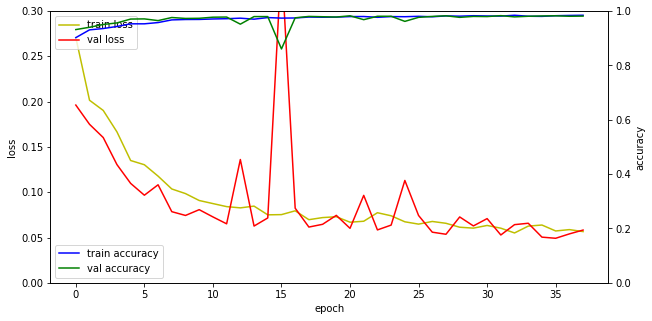

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()   # 오른쪽 y 축 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.3]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1]) # 0.0, 1: 0 ~ 100 %, 정확도임으로 변경하지 않음

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.034600399754400914 /정확도: 99.38461780548096 %


In [12]:
model.save('./Wine2.h5')

In [13]:
model = load_model('./Wine2.h5')

In [14]:
pd = model.predict(x_test[0:100])

for i in range(len(x_test[0:100])):
    fmt = '실제값: {0}, 예측값: {1}'
    print(fmt.format(y_test[i], pd[i]), end='')
    
    if (pd[i] >= 0.5): # 임계값의 지정, 정확도를 참고하여 판단
    # if (pd[i] >= 0.01):
        print('--> Red 와인')   # 1
    else:
        print('--> White 와인') # 0

실제값: 0.0, 예측값: [0.00081259]--> White 와인
실제값: 0.0, 예측값: [0.00069383]--> White 와인
실제값: 0.0, 예측값: [0.00314051]--> White 와인
실제값: 0.0, 예측값: [0.00048438]--> White 와인
실제값: 1.0, 예측값: [0.01800719]--> White 와인
실제값: 0.0, 예측값: [0.00752944]--> White 와인
실제값: 0.0, 예측값: [0.00501248]--> White 와인
실제값: 0.0, 예측값: [0.00149179]--> White 와인
실제값: 0.0, 예측값: [0.01883116]--> White 와인
실제값: 0.0, 예측값: [0.00124714]--> White 와인
실제값: 1.0, 예측값: [0.99999034]--> Red 와인
실제값: 0.0, 예측값: [0.00307524]--> White 와인
실제값: 1.0, 예측값: [1.]--> Red 와인
실제값: 1.0, 예측값: [0.9999404]--> Red 와인
실제값: 1.0, 예측값: [0.99765503]--> Red 와인
실제값: 0.0, 예측값: [0.00104678]--> White 와인
실제값: 0.0, 예측값: [0.00889418]--> White 와인
실제값: 0.0, 예측값: [0.00666332]--> White 와인
실제값: 1.0, 예측값: [0.6745974]--> Red 와인
실제값: 0.0, 예측값: [0.00023252]--> White 와인
실제값: 0.0, 예측값: [0.00156036]--> White 와인
실제값: 0.0, 예측값: [0.00167978]--> White 와인
실제값: 1.0, 예측값: [0.99999714]--> Red 와인
실제값: 1.0, 예측값: [0.9999732]--> Red 와인
실제값: 0.0, 예측값: [0.00118765]--> White 와인
실제값: 0.0, 예측값: [0.0368114

In [15]:
red = 0
white = 0
for i in range(len(y_test)):
    if y_test[i] == 1:  # red wine 인지 검사
        red = red + 1
    else:
        white = white + 1

print('Red wine:', red)
print('White wine:', white)

Red wine: 160
White wine: 490


In [20]:
# 결과 - 혼돈 행렬
print(x_test.shape)
y_test_pred = model.predict_classes(x_test)
c_matrix = confusion_matrix(y_test, y_test_pred) # 실제값, 예측값
print(c_matrix)

(650, 12)
[[490   0]
 [  4 156]]


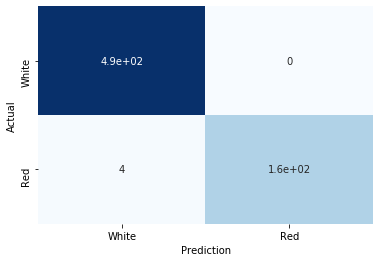

<Figure size 432x288 with 0 Axes>

In [21]:
ax = sb.heatmap(c_matrix, annot=True, 
                 xticklabels=['White', 'Red'], 
                 yticklabels=['White', 'Red'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()
# [[white wine 맞춘 갯수   white wine 틀린 갯수]
#  [red wine 틀린 갯수 red wine 맞춘 갯수]]
# 화이트 와인은 100% 맞췄다
# 레드 와인은 4개 틀렸다
# 이런 것을 confusion matrix라고 부름

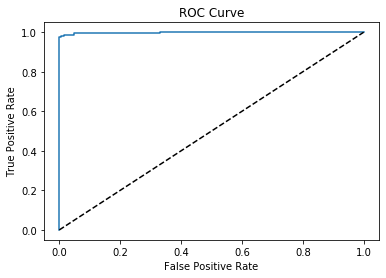

<Figure size 432x288 with 0 Axes>

In [22]:
# 결과 - ROC 곡선
y_test_pred_probs = model.predict(x_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()